<bound method FacetGrid.set_ylabels of <seaborn.axisgrid.FacetGrid object at 0x7fcf461345e0>>

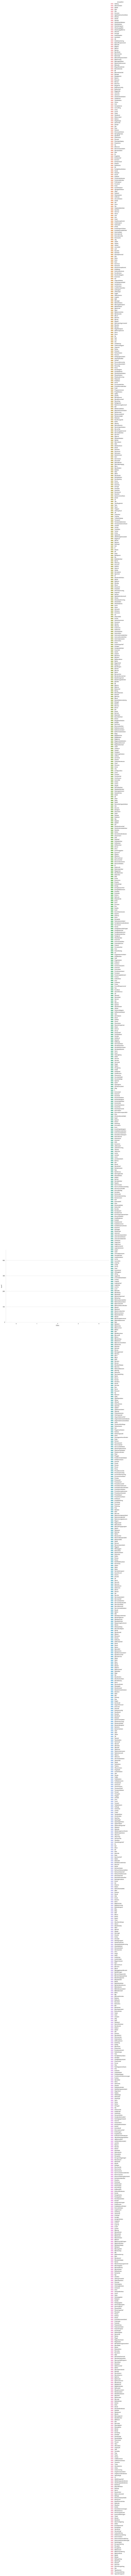

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


def plot_most_common_words(word_counts, num_words):
    # Sort the list of word-frequency pairs in descending order of frequency
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:num_words])
    plt.barh(range(len(top_words)), list(top_words.values()), align='center')
    plt.yticks(range(len(top_words)), list(top_words.keys()))
    plt.gca().invert_yaxis()
    plt.xlabel('Frequency')
    plt.title(f'Top {num_words} Most Common Words')
    plt.show()


# Load the dataset
df = pd.read_csv('dfsvenska.csv', encoding='utf-8')

# Concatenate the 'occupation' and 'description' columns into one column 'text'
df['text'] = df['occupation'] + ' ' + df['description']

# Preprocess the data
df = df[['text']]
df = df.dropna() # Remove any rows with missing data
df = df.reset_index(drop=True) # Reset the index

# Define a custom stop words list for Swedish
swedish_stop_words = [
    'och', 'i', 'att', 'en', 'som', 'för', 'med', 'till', 'på', 'är',
    'av', 'om', 'den', 'de', 'vi', 'du', 'han', 'hon', 'det', 'så',
    'kan', 'men', 'hur', 'när', 'där', 'var', 'sig', 'ett', 'från',
    'ha', 'har', 'inte', 'eller', 'man', 'vid', 'blir', 'blev', 'gör',
    'gjort', 'gjorde', 'göra', 'ska', 'skall', 'samma', 'sådan', 'sådant',
    'sådana', 'din', 'ditt', 'mina', 'mitt', 'enligt', 'både', 'även',
    'första', 'genom', 'mellan', 'någon', 'något', 'några', 'sista',
    'under', 'utan', 'över', 'förra', 'fram', 'hela', 'närvarande',
    'sista', 'samma', 'samma', 'samma'
]

# Convert the job descriptions to a numerical representation
vectorizer = TfidfVectorizer(stop_words=swedish_stop_words)
job_descriptions = vectorizer.fit_transform(df['text'])

# Cluster the job descriptions using K-Means
kmeans = KMeans(n_clusters=5, random_state=42).fit(job_descriptions)
df['class'] = kmeans.labels_

# Calculate the frequency of each occupation in each class
df['occupation'] = df['text'].str.extract('(\\b[A-Z][a-z]+\\b)') # Extract the occupation from the 'text' column
occupation_frequency = df.groupby(['class', 'occupation']).size().reset_index(name='count')

# Plot the bar chart
sns.set_style('whitegrid')
g = sns.catplot(x='class', y='count', hue='occupation', data=occupation_frequency, kind='bar', height=8.27, aspect=11.7/8.27)
g.set_xlabels('Class')
g.set_ylabels
